## Convocatoria 1 - Proyecto 1

#### 0) Cargar una de las imágenes histológicas

Valor máximo antes de normalizar 255
Valor máximo después de normalizar 1.0
(1024, 1024, 3)


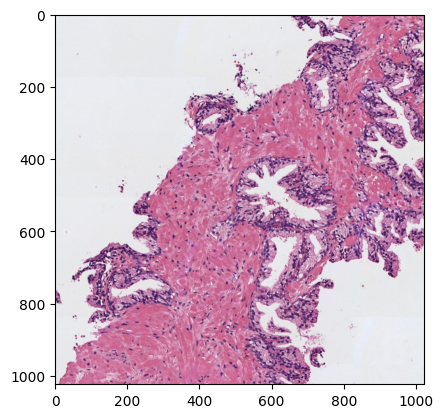

In [3]:
# Utilizar la librería skimage.io para leer la imagen 'histo_x.jpg' en formato RGB.
# Normalizar la imagen para que los píxeles se encuentren en el rango [0, 1]
# Visualizar la imagen
import skimage.io as io
import matplotlib.pyplot as plt

image = io.imread('imgs/histo_1.jpg')

print("Valor máximo antes de normalizar",image.max())

image = image / 255

print("Valor máximo después de normalizar",image.max())

print(image.shape)

plt.imshow(image)
plt.show()

#### 1) Realizar una transformación de color para convertir la imagen al espacio de color CMYK

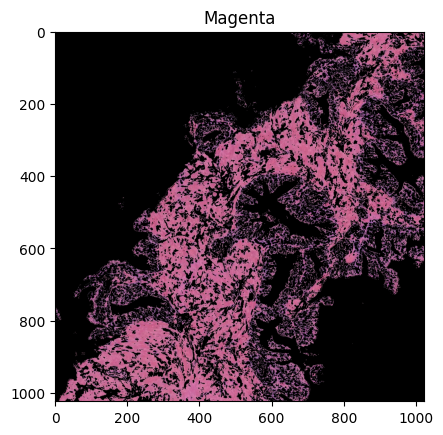

In [34]:
# Extraer la componente magenta de la imagen (que corresponde a la región tisular)
# Visualizar la imagen del canal magenta

#Al ser RGB, el magenta es la combinación de rojo, azul y un poco de verde

rojo = image[:,:,0]
verde = image[:,:,1]
azul = image[:,:,2]

mascara = (rojo > 0.5) & (verde < 0.5) & (azul > 0.5)

magenta = image.copy()

magenta[~mascara] = 0

plt.title("Magenta")
plt.imshow(magenta, cmap='gray')
plt.show()

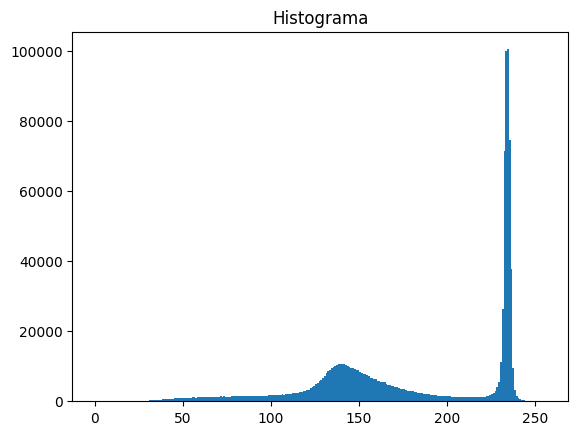

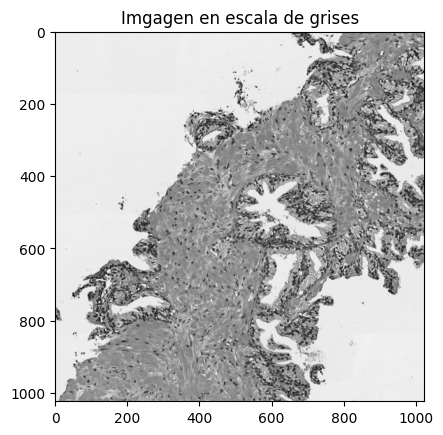

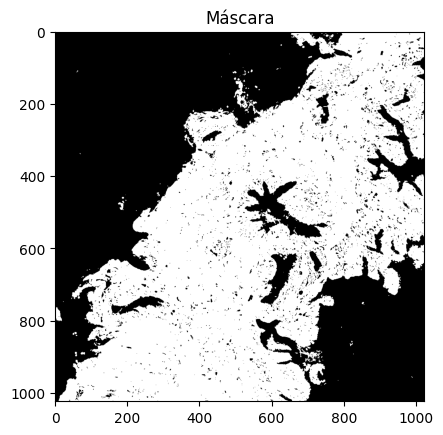

In [32]:
#Extracción directa de treshold
import cv2

image_uint8 = (image * 255).astype('uint8')

img = cv2.cvtColor(image_uint8, cv2.COLOR_RGB2GRAY)

plt.title("Histograma")
plt.hist(img.flatten(), bins=256, range=[0,256])
plt.show()

plt.title("Imgagen en escala de grises")
plt.imshow(img, cmap='gray')
plt.show()

mascara_magenta = (img > 200).astype('uint8')
mascara_magenta = ~mascara_magenta

plt.title("Máscara")
plt.imshow(mascara_magenta, cmap='gray')
plt.show()


#### 2) Umbralizar la imagen para separar los píxeles del fondo de la región tisular

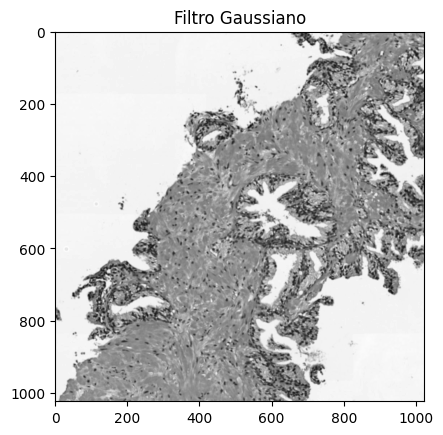

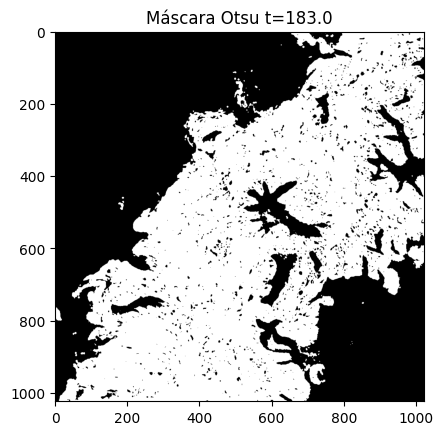

np.uint8(255)

In [36]:
# Aplicar un filtro gaussiano de tamaño 5x5 y después utilizar el método de Otsu de manera que
# los píxeles correspondientes al lumen y al background de la imagen sean 1s y el resto de los píxeles tengan un valor de 0.
# Nota: Recordar que el método de Otsu requiere como input una imagen en el rango [0-255] en formato "uint8".
# Visualizar la máscara resultante

from cv2 import GaussianBlur

gauss = GaussianBlur(img, (5, 5), 0)

plt.title('Filtro Gaussiano')
plt.imshow(gauss, cmap='gray')
plt.show()

t, mask = cv2.threshold(gauss, 0, 1,cv2.THRESH_OTSU)
mask = ~mask

plt.title('Máscara Otsu t=' + str(t))
plt.imshow(mask, cmap='gray')
plt.show()

#### 3) Limpiar la imagen eliminando los artefactos de lumen (objetos blancos pequeños que no son lúmenes)

In [ ]:
# Utilizar la librería skimage.morphology.remove_small_objects para eliminar aquellos objetos cuya área sea menor a 300 píxeles
# Más información en https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.remove_small_objects
# Visualizaer la máscara resultante

#### 4) Rellenar con 0s el fondo de la imagen para quedarnos únicamente con los lúmenes

In [ ]:
# Aplicar el algoritmo de expansión a partir de semillas (region growing) de manera que únicamente los lúmenes sean blancos
# y el resto de la imagen negra. Pista: utilizar dos semillas. Nota: Se pueden fijar las semillas de manera manual, pero
# se valorará positivamente a aquell@s que desarrollen una función para encontrarlas automáticamente.
# Visualizar la máscara resultante. 

#### 5) Rellenar los objetos de los lúmenes

In [ ]:
# Rellenar los lúmenes con la función binary_fill_holes de la librería scipy.ndimage.morphology
# Visualizar la máscara resultante

#### 6) Detectar y dibujar los contornos de los lúmenes sobre la imagen original

In [ ]:
# Dibujar los contornos de los lúmenes en color verde sobre la imagen original RGB. Nota: Utilizar los flags necesarios
# para que los contornos en verde sean perfectamente visibles. 
# Visualizar la imagen superpuesta

#### 7) Identificar y cropear el lumen más grande

In [ ]:
# Determinar cuál es el lumen de mayor área y hacer un crop del mismo sobre la imagen original RGB.
# Visualizar el lumen cropeado.

#### 8) Extraer 13 características geométricas que permitan caracterizar el lumen recortado 

In [ ]:
# Calcular las siguientes características del crop del lumen de mayor área, redondeando su valor hasta el cuarto decimal.
# 1) Área
# 2) Área de la bounding box
# 3) Área convexa
# 4) Exentricidad
# 5) Diámetro equivalente
# 6) Extensión
# 7) Diámetro Feret
# 8) Longitud del eje mayor
# 9) Longitud del eje menor
# 10) Orientación
# 11) Perímetro
# 12) Solidez
# 13) Compacidad